In [1]:
from ess.loki.nurf import utils, fluo, plot
from ess.loki.nurf import ill_auxilliary_funcs as ill 

# standard library imports
import itertools
import os
from typing import Optional, Type, Union

# related third party imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from scipy.optimize import leastsq  # needed for fitting of turbidity

# local application imports
import scippnexus as snx
import scipp as sc

In [2]:
# Prepare for export to .dat for uv and fluo

# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
# change to folder
os.chdir(process_folder)

# export path for .dat files
path_output='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version/dat-files'
graphpath_output='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version/graphs'


# experimental data sets
exp5= [66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]

exp2= [65925, 65927, 65930, 65933, 65936, 65939, 65942, 65945, 65948, 65951, 65954, 65957]
exp3= [65962, 65965, 65968, 65971, 65974, 65977, 65980, 65983, 65986, 65989, 65992]

exp7= [66083, 66086, 66089, 66092, 66095, 66098, 66101, 66104, 66107, 66110, 66113]
exp8= [66116, 66119, 66122, 66125, 66128, 66131, 66134, 66137, 66140, 66143, 66146]

In [9]:
exp_meth='fluorescence'
name='066029.nxs'

# load and calculate fluo spectra in one command
fluo_da=fluo.load_and_normalize_fluo(name)

display(fluo_da)

sc.show(fluo_da)

svg_fluo_file=sc.make_svg(fluo_da)

with open('/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/Post-doc_Studium_MAXIV/MIH_Zahnprojekt/UU_Institutsseminar/XFEL_Vortrag/fluo_da_exp.svg', 'w') as f:
    f.write(svg_fluo_file)

<scipp.DataArray>
Dimensions: Sizes[spectrum:12, wavelength:1044, ]
Coordinates:
  integration_time          float32            [µs]  (spectrum)  [5e+07, 5e+07, ..., 5e+07, 5e+07]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, ..., True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  monowavelengths           float32             [nm]  (spectrum)  [320, 320, ..., 320, 320]
  time                        int64            [µs]  (spectrum)  [1655992257000000, 1655992257000000, ..., 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [248.684, 249.485, ..., 1042.31, 1043.03]
Data:
                            float32         [counts]  (spectrum, wavelength)  [1.4e-07, 1.00001e-07, ..., 1.00001e-07, 9.99971e-08]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066029.nxs", "066029.nxs", ..., "066029.nxs", "066029.nxs"]

/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version


/opt/anaconda3/envs/dev/lib/python3.9/site-packages/scipp/plotting/figure1d.py:231: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(rect=self.bounding_box)
/opt/anaconda3/envs/dev/lib/python3.9/site-packages/scipp/plotting/figure1d.py:231: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(rect=self.bounding_box)


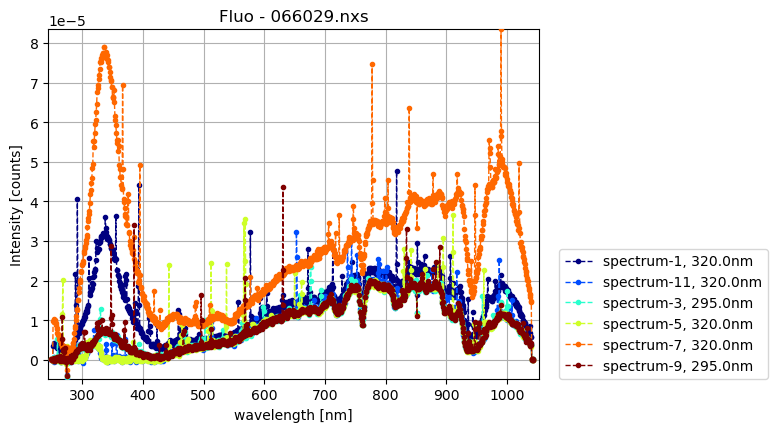

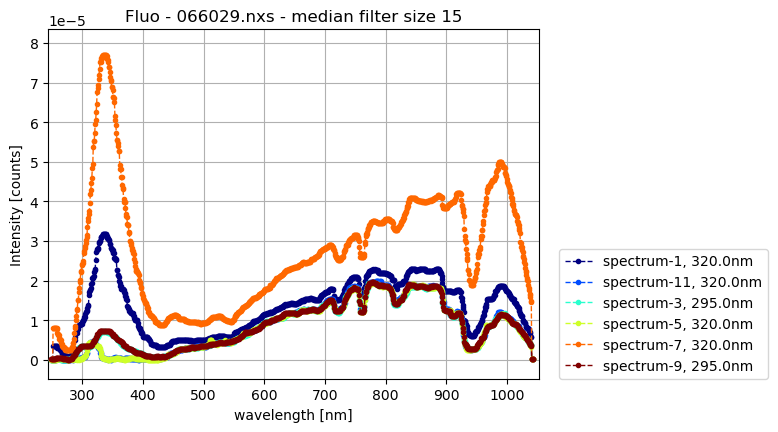

In [3]:
exp_meth='fluorescence'
name='066029.nxs'

# set legend props
legend_props = {"show": True, "loc": (1.04, 0)}

# load and calculate fluo spectra in one command
fluo_da=fluo.load_and_normalize_fluo(name)

#quick plot
!pwd
graph_name=f"Fluo_spectra_{name}.pdf"
graph_out=os.path.join(graphpath_output, graph_name)

# prepare a good graph for a poster
cm = 1/2.54  # centimeters in inches
#figsize_b=6
#figsize_a=1.333*figsize_b
figsize_a=20
figsize_b=11.25
dpi=1200

fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(figsize_a*cm, figsize_b*cm) )

# load and calculate fluo spectra in two lines
fluo_dict=utils.load_nurfloki_file(name,'fluorescence')  
final_fluo = fluo.normalize_fluo(**fluo_dict)  


only_good_fspectra = {}  # make empty dict
for i in range(1, fluo_dict["sample"].sizes["spectrum"], 2):
    mwl = str(final_fluo.coords["monowavelengths"][i].value) + "nm"
    only_good_fspectra[f"spectrum-{i}, {mwl}"] = final_fluo["spectrum", i]

out4 = sc.plot(
    only_good_fspectra,
    linestyle="dashed",
    grid=True,
    legend=legend_props,
    marker='.',
    title=f"Fluo - {name}",
    ylabel='Intensity [counts]',
    color=plot.line_colors(len(only_good_fspectra)),
    figsize=(figsize_a*cm, figsize_b*cm),
    ax=ax1
)
out4.ax.set_xlim([np.min(fluo_da.coords["wavelength"].values)*0.98, np.max(fluo_da.coords["wavelength"].values)*1.01])
out4.ax.set_ylim([np.nanmin(fluo_da.data.values), np.nanmax(fluo_da.data.values)])


plt.tight_layout()
plt.savefig(graph_out, dpi=dpi,bbox_inches='tight')

######################################################

graph_name=f"Fluo_spectra_{name}_median.pdf"
graph_out_filt=os.path.join(graphpath_output, graph_name)

#apply median filter
kernel_size=15
final_fluo_filt=utils.nurf_median_filter(final_fluo, kernel_size=kernel_size)

cm = 1/2.54  # centimeters in inches
#figsize_b=6
#figsize_a=1.333*figsize_b
figsize_a=20
figsize_b=11.25
dpi=1200

fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, figsize=(figsize_a*cm, figsize_b*cm) )


only_good_fspectra_filt= {}  # make empty dict
for i in range(1, fluo_dict["sample"].sizes["spectrum"], 2):
    mwl = str(final_fluo.coords["monowavelengths"][i].value) + "nm"
    only_good_fspectra_filt[f"spectrum-{i}, {mwl}"] = final_fluo_filt["spectrum", i]



out5 = sc.plot(
    only_good_fspectra_filt,
    linestyle="dashed",
    grid=True,
    marker='.',
    legend=legend_props,
    title=f"Fluo - {name} - median filter size {kernel_size}",
    ylabel='Intensity [counts]',
    color=plot.line_colors(len(only_good_fspectra_filt)),
    figsize=(figsize_a*cm, figsize_b*cm),
    ax=ax2
)
out5.ax.set_xlim([np.min(fluo_da.coords["wavelength"].values)*0.98, np.max(fluo_da.coords["wavelength"].values)*1.01])
out5.ax.set_ylim([np.nanmin(fluo_da.data.values), np.nanmax(fluo_da.data.values)])

plt.tight_layout()
plt.savefig(graph_out_filt, dpi=dpi,bbox_inches='tight')




In [3]:
# load and calculate fluo spectra in two lines
fluo_dict=utils.load_nurfloki_file(name,'fluorescence')  
final_fluo = fluo.normalize_fluo(**fluo_dict)  


#apply median filter
kernel_size=15
final_fluo_filt=utils.nurf_median_filter(final_fluo, kernel_size=kernel_size)

fig3, ax3 = plt.subplots(1, 1, constrained_layout=True, figsize=(figsize_a*cm, figsize_b*cm) )


only_good_fspectra_filt= {}  # make empty dict
for i in range(1, fluo_dict["sample"].sizes["spectrum"], 2):
    mwl = str(final_fluo.coords["monowavelengths"][i].value) + "nm"
    only_good_fspectra_filt[f"spectrum-{i}, {mwl}"] = final_fluo_filt["spectrum", i]



out6 = sc.plot(
    only_good_fspectra_filt,
    linestyle="dashed",
    grid=True,
    marker='.',
    legend=legend_props,
    title=f"Fluo - {name} - median filter size {kernel_size}",
    ylabel='Intensity [counts]',
    color=plot.line_colors(len(only_good_fspectra_filt)),
    figsize=(figsize_a*cm, figsize_b*cm),
    ax=ax3
)
out6.ax.set_xlim([np.min(fluo_da.coords["wavelength"].values)*0.98, np.max(fluo_da.coords["wavelength"].values)*1.01])
out6.ax.set_ylim([np.nanmin(fluo_da.data.values), np.nanmax(fluo_da.data.values)])




NameError: name 'name' is not defined

Cell below shows how to load fluo spectra from a Loki.nxs file

In [5]:
# filename
name='066017.nxs'
# method
exp_meth='fluorescence'

# some plotting options
legend_props = {"show": True, "loc": (1.04, 0)}
figure_size = (8, 4)

# load a file and caluclate fluo spectra within a LoKI.nxs file
fluo_dict=utils.load_nurfloki_file(name,exp_meth)
fluo_da=fluo.normalize_fluo(**fluo_dict)

print("This is the resulting dataarray")
display(fluo_da)

#if you want to view a quick plot
display(sc.plot(sc.collapse(fluo_da, keep="wavelength"), legend=legend_props, linestyle="dashed", color=plot.line_colors((fluo_da.sizes['spectrum'])),
        grid=True,figsize=figure_size,  title=f"{name}"))


# or in one line, preserves source attribute
fluo_da2=fluo.load_and_normalize_fluo(name)

display(fluo_da2)

#plot result
display(sc.plot(sc.collapse(fluo_da2, keep="wavelength"), legend=legend_props, linestyle="dashed",  color=plot.line_colors((fluo_da2.sizes['spectrum'])),
        grid=True,figsize=figure_size, title=f"{name}"))


# apply a median filter
# prepare kernel
kernel_size=15

# apply median filter
fluo_da2_filt=utils.nurf_median_filter(fluo_da2, kernel_size=kernel_size)

# plot result with median filter
display(sc.plot(sc.collapse(fluo_da2_filt, keep="wavelength"), legend=legend_props, linestyle="dashed",  color=plot.line_colors((fluo_da2.sizes['spectrum'])),
        grid=True,figsize=figure_size, title=f"{name} - median filter size {kernel_size}"))



This is the resulting dataarray


<scipp.DataArray>
Dimensions: Sizes[spectrum:12, wavelength:1044, ]
Coordinates:
  integration_time          float32            [µs]  (spectrum)  [5e+07, 5e+07, ..., 5e+07, 5e+07]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, ..., True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  monowavelengths           float32             [nm]  (spectrum)  [295, 295, ..., 320, 320]
  time                        int64            [µs]  (spectrum)  [1655992257000000, 1655992257000000, ..., 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [248.684, 249.485, ..., 1042.31, 1043.03]
Data:
                            float32         [counts]  (spectrum, wavelength)  [6.00012e-08, 1.19999e-07, ..., 1.20002e-07, 7.99992e-08]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", ..., "066017.nxs", "066017.nxs"]

<scipp.DataArray>
Dimensions: Sizes[spectrum:12, wavelength:1044, ]
Coordinates:
  integration_time          float32            [µs]  (spectrum)  [5e+07, 5e+07, ..., 5e+07, 5e+07]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, ..., True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  monowavelengths           float32             [nm]  (spectrum)  [295, 295, ..., 320, 320]
  time                        int64            [µs]  (spectrum)  [1655992257000000, 1655992257000000, ..., 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [248.684, 249.485, ..., 1042.31, 1043.03]
Data:
                            float32         [counts]  (spectrum, wavelength)  [6.00012e-08, 1.19999e-07, ..., 1.20002e-07, 7.99992e-08]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", ..., "066017.nxs", "066017.nxs"]

The cell below shows how to plot the fluo content of a Loki file. Currently, the code differentiates between good and bad spectra because during the measurements at ILL technical problems occured.

In [6]:
#How to plot fluo the fluo spectra contained in one LoKI.nxs file
plot.plot_fluo(name)

In [7]:
#How to load and normalize fluo spectra of one file in one go.
fluo_da=fluo.load_and_normalize_fluo(name) 
display(fluo_da)

<scipp.DataArray>
Dimensions: Sizes[spectrum:12, wavelength:1044, ]
Coordinates:
  integration_time          float32            [µs]  (spectrum)  [5e+07, 5e+07, ..., 5e+07, 5e+07]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, ..., True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  monowavelengths           float32             [nm]  (spectrum)  [295, 295, ..., 320, 320]
  time                        int64            [µs]  (spectrum)  [1655992257000000, 1655992257000000, ..., 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [248.684, 249.485, ..., 1042.31, 1043.03]
Data:
                            float32         [counts]  (spectrum, wavelength)  [6.00012e-08, 1.19999e-07, ..., 1.20002e-07, 7.99992e-08]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", ..., "066017.nxs", "066017.nxs"]

How to apply a median filter. Let's use the new median_filter offered by scipp.

In [8]:
#How to load and normalize fluo spectra of one file in one go.
fluo_da=fluo.load_and_normalize_fluo(name) 

# prepare kernel
kernel_size=15

# apply median filter
fluo_da_filt=utils.nurf_median_filter(fluo_da, kernel_size=kernel_size)

#show effect of median_filter
legend_props = {"show": True, "loc": (1.04, 0)}
fig1=sc.plot(sc.collapse(fluo_da, keep='wavelength'), marker='.', title='before any median filter',legend=legend_props,grid=True)
fig2=sc.plot(sc.collapse(fluo_da_filt, keep='wavelength'), marker='.', title=f'after median filter, size={kernel_size} ',legend=legend_props, grid=True)
display(fig1,fig2)

Cell belows how to extract from one fluo measurement the maximum intensity and the corresponding wavelength

This is the fluo_filt_max scipp array


<scipp.Dataset>
Dimensions: Sizes[spectrum:12, ]
Coordinates:
  integration_time          float32            [µs]  (spectrum)  [5e+07, 5e+07, ..., 5e+07, 5e+07]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, ..., True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  monowavelengths           float32             [nm]  (spectrum)  [295, 295, ..., 320, 320]
  time                        int64            [µs]  (spectrum)  [1655992257000000, 1655992257000000, ..., 1655992257000000, 1655992257000000]
Data:
  intensity_max             float32  [dimensionless]  (spectrum)  [2.80001e-07, 3.3e-05, ..., 4.86e-06, 4.6e-06]
    Attributes:
        source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", ..., "066017.nxs", "066017.nxs"]
  wavelength_max            float32             [nm]  (spectrum)  [373.545, 333.974, ..., 316.505, 314.915]
    Attributes:
        source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", ..., "066017.nxs", "066017.nxs"]

/opt/anaconda3/envs/dev/lib/python3.9/site-packages/scipp/plotting/figure1d.py:231: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(rect=self.bounding_box)
/opt/anaconda3/envs/dev/lib/python3.9/site-packages/scipp/plotting/figure1d.py:231: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(rect=self.bounding_box)


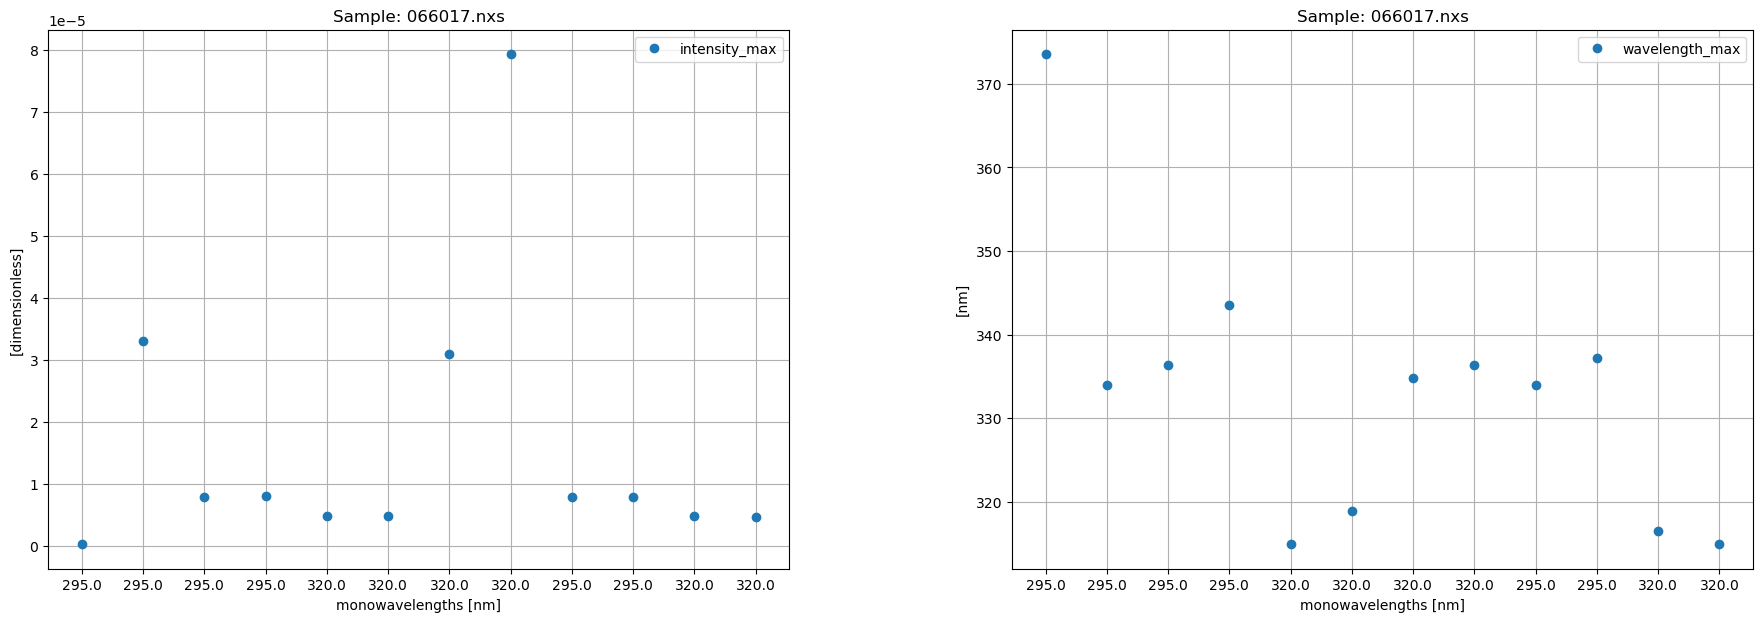

In [9]:
wllim=sc.scalar(300, unit='nm')
wulim=sc.scalar(400, unit='nm')

name='066017.nxs'

fluo_da=fluo.load_and_normalize_fluo(name)
fluo_filt_max = fluo.fluo_peak_int(fluo_da,wllim=wllim,wulim=wulim,medfilter=True,kernel_size=15)

print('This is the fluo_filt_max scipp array')
display(fluo_filt_max)

plot.plot_fluo_peak_int(fluo_da, wllim=wllim,wulim=wulim,medfilter=True,kernel_size=15)

Cell belows shows how to extract max intensity and corresponding wavelength from many files. Results are plotted in two graphs for all input files.

['066017.nxs', '066020.nxs', '066023.nxs', '066026.nxs', '066029.nxs', '066032.nxs', '066034.nxs', '066037.nxs', '066040.nxs', '066043.nxs', '066046.nxs']


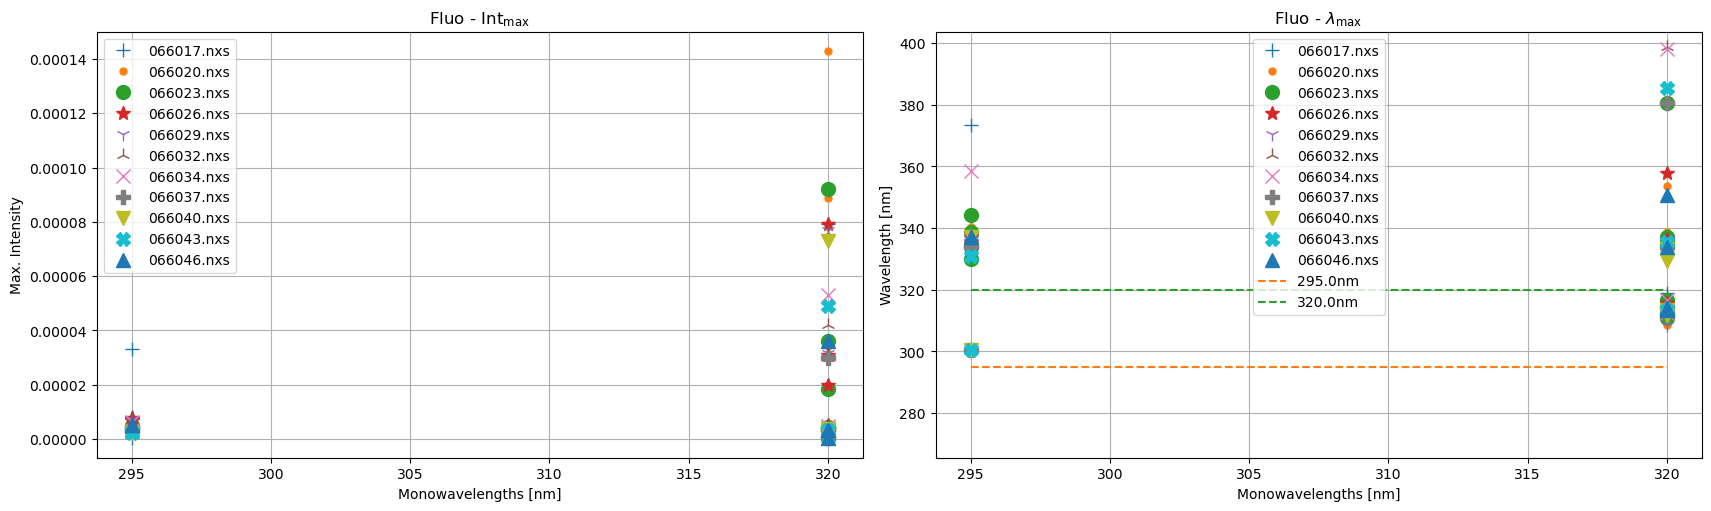

In [10]:
# experimental data sets
exp5= [66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
#exp5= [66017, 66046]

filelist=ill.complete_fname(exp5)

# We need a wavelength interval
wllim=sc.scalar(300, unit='nm')
wulim=sc.scalar(400, unit='nm')

# Calculate and plot max intensity for each spectrum in each file and plot corresponding wavelength
fig=plot.plot_fluo_multiple_peak_int(filelist, wllim=wllim, wulim=wulim, medfilter=True, kernel_size=15)


#How to export the graphs
graph_name=f"Fluo_peak_int_exp5.pdf"
graph_out=os.path.join(graphpath_output, graph_name)
plt.savefig(graph_out,dpi=1200,bbox_inches='tight')
